<a href="https://colab.research.google.com/github/rinisdataanalyst/covid-19-project/blob/main/Uber%20Trips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import pandas as pd
import matplotlib.pyplot as ply
import seaborn as sns

df=pd.read_csv("/content/drive/MyDrive/uber-raw-data-sep14.csv")

In [26]:
df

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
862244,9/4/2014 16:05:00,40.7210,-73.9936,B02764
862245,9/4/2014 16:05:00,40.7619,-73.9716,B02764
862246,9/4/2014 16:05:00,40.6751,-73.9809,B02764
862247,9/4/2014 16:05:00,40.7652,-73.9708,B02764


In [29]:
df["Date/Time"]=df["Date/Time"].map(pd.to_datetime)
df

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
862244,2014-09-04 16:05:00,40.7210,-73.9936,B02764
862245,2014-09-04 16:05:00,40.7619,-73.9716,B02764
862246,2014-09-04 16:05:00,40.6751,-73.9809,B02764
862247,2014-09-04 16:05:00,40.7652,-73.9708,B02764


Prepare the data according to days and hours

In [36]:
df["day"]=df['Date/Time'].apply(lambda x: x.day)
df["weekday"]=df["Date/Time"].apply(lambda x: x.weekday())
df["hour"]=df["Date/Time"].apply(lambda x: x.hour)

In [37]:
df

,Date/Time,Lat,Lon,Base,day,weekday,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0
...,...,...,...,...,...,...,...
862244,2014-09-04 16:05:00,40.7210,-73.9936,B02764,4,3,16
862245,2014-09-04 16:05:00,40.7619,-73.9716,B02764,4,3,16
862246,2014-09-04 16:05:00,40.6751,-73.9809,B02764,4,3,16
862247,2014-09-04 16:05:00,40.7652,-73.9708,B02764,4,3,16


Look at each day to see which day the uber trips is the highest

<ipython-input-40-4c78e0eb610c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['day'])


<Axes: xlabel='day', ylabel='Density'>

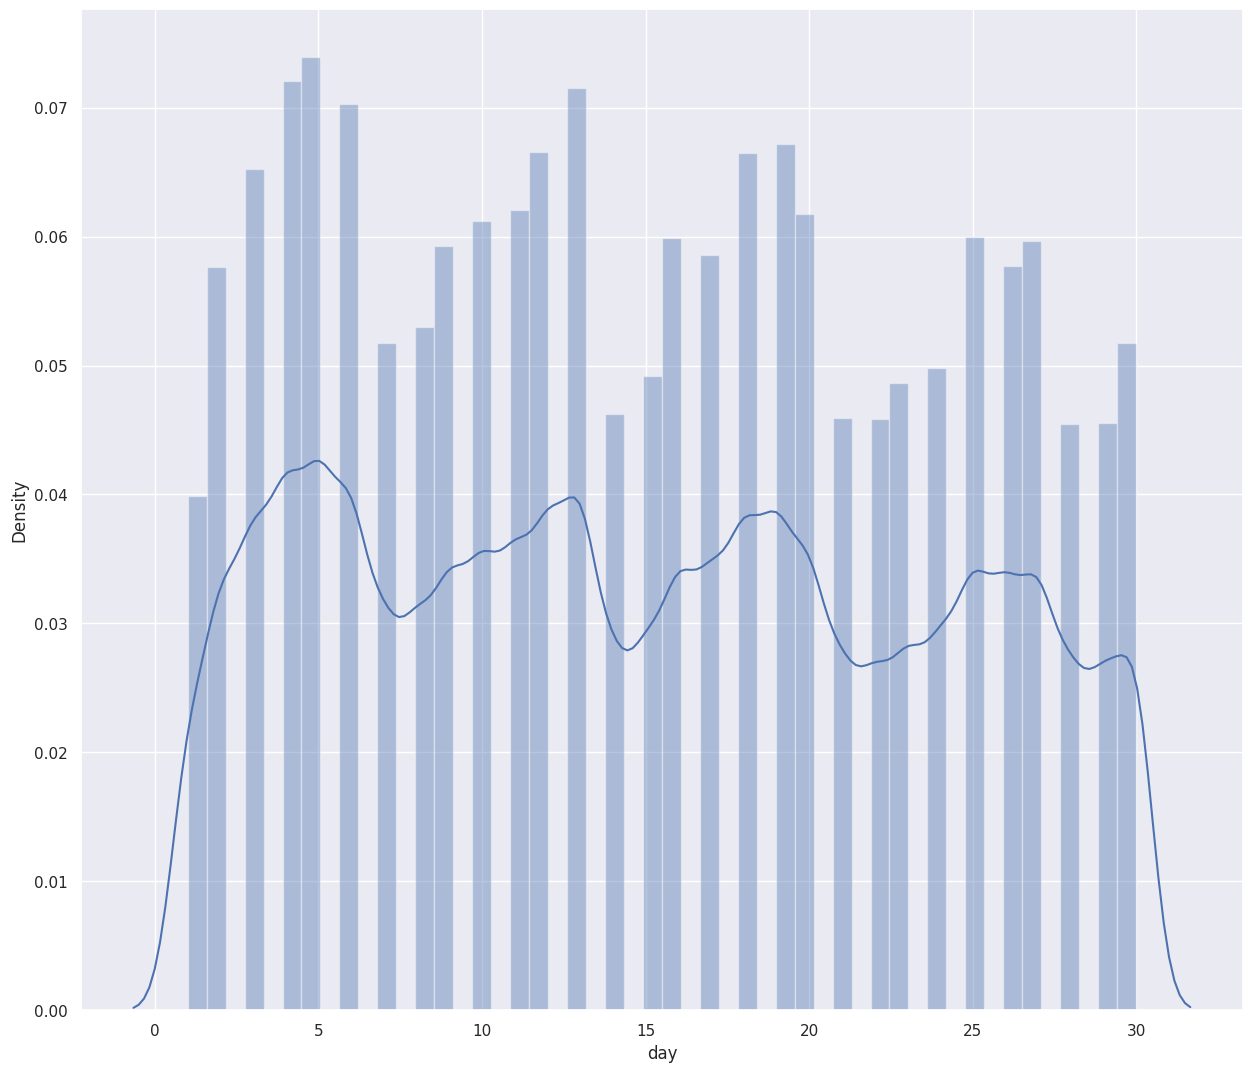

In [40]:
sns.set(rc={'figure.figsize':(15,13)})
sns.distplot(df['day'])


analyse the uber trips according to *hours*

<ipython-input-41-22d9e4c71908>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['hour'])


<Axes: xlabel='hour', ylabel='Density'>

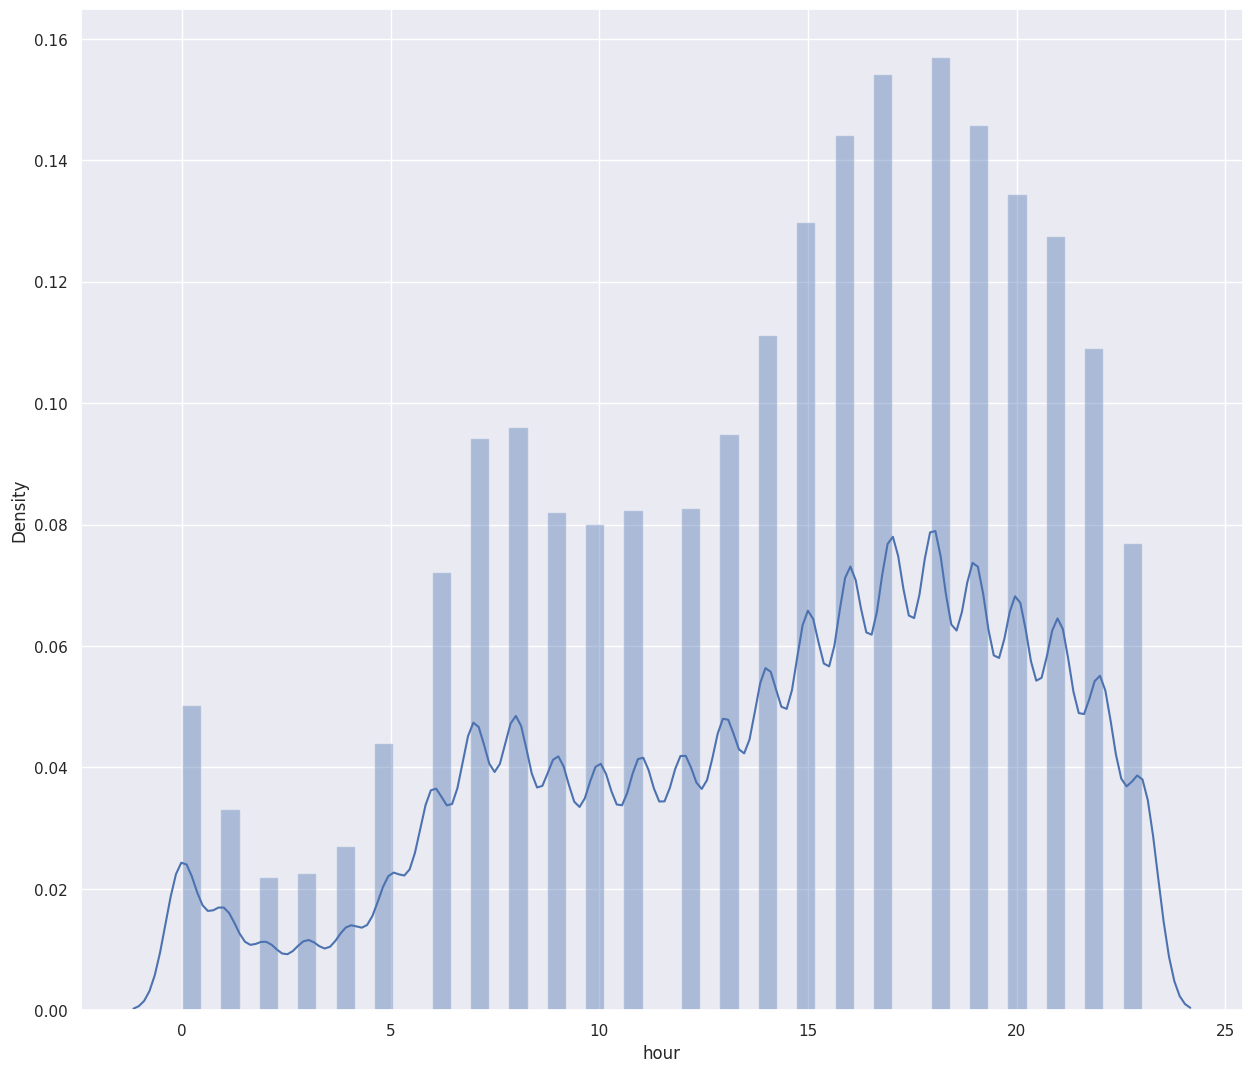

In [41]:
sns.set(rc={'figure.figsize':(15,13)})
sns.distplot(df['hour'])

analyse the uber trips according to *weekdays


<ipython-input-43-e11b800a2fec>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['weekday'])


<Axes: xlabel='weekday', ylabel='Density'>

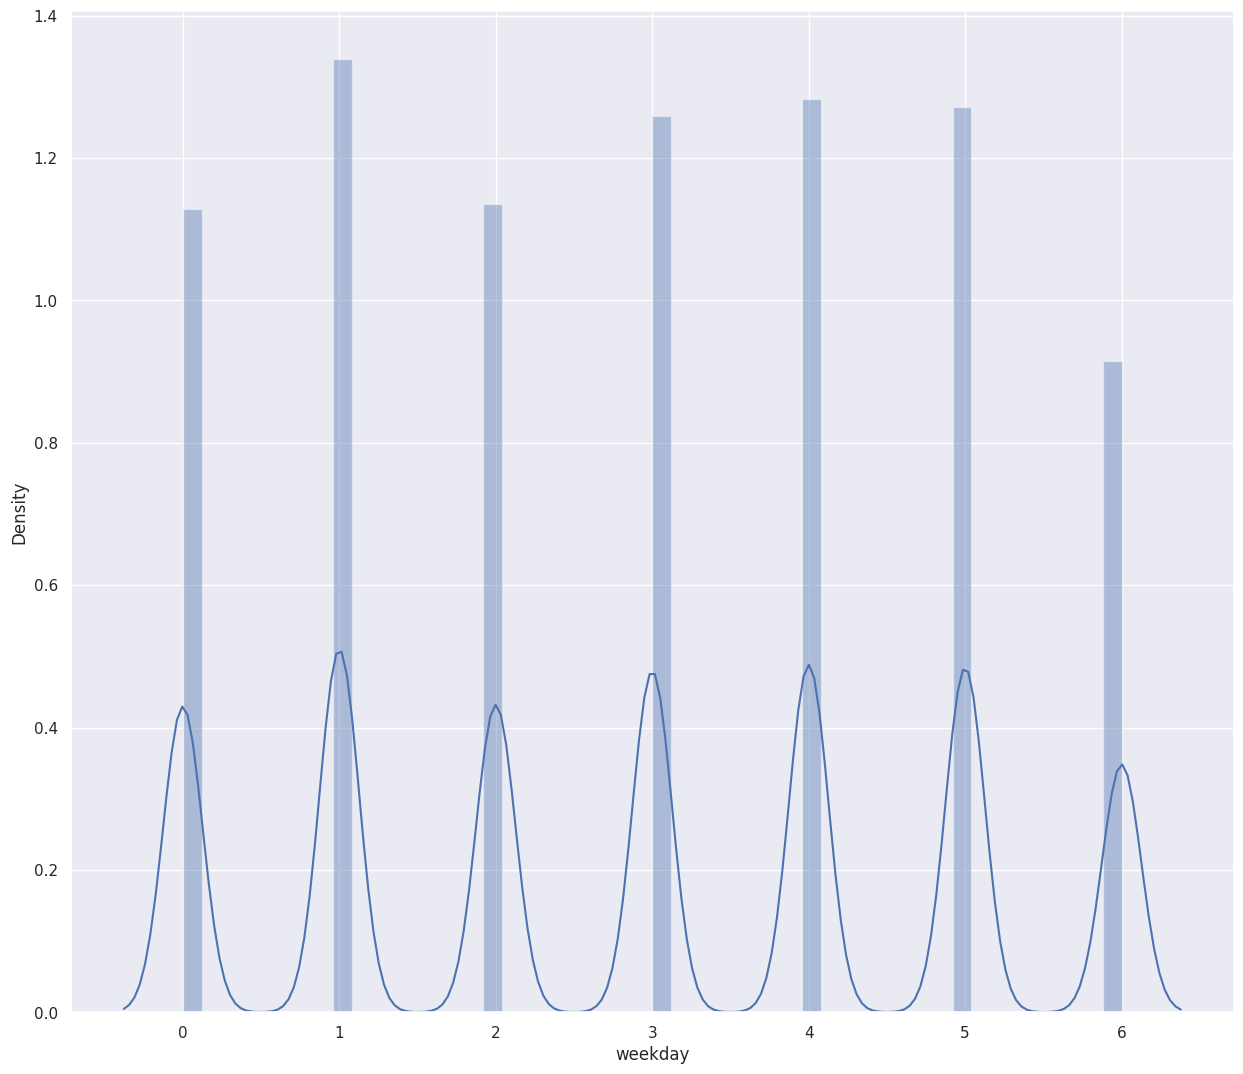

In [43]:
sns.set(rc={'figure.figsize':(15,13)})
sns.distplot(df['weekday'])

correlation of hours and weekdays

<Axes: xlabel='hour', ylabel='weekday'>

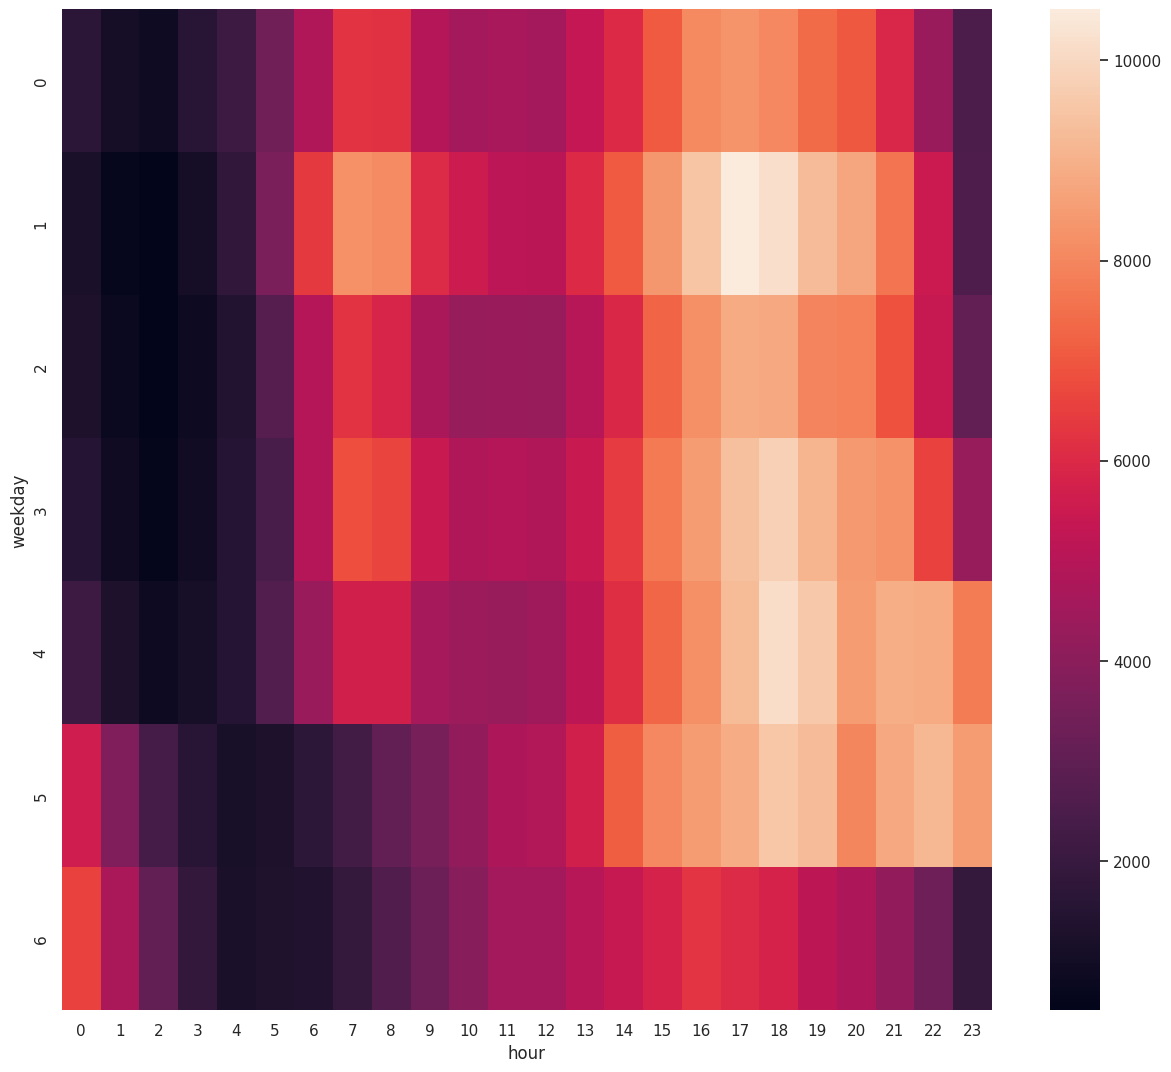

In [45]:
d=df.groupby(["weekday","hour"]).apply(lambda x: len(x))
d=d.unstack()
sns.heatmap(d,annot=False)

<Axes: xlabel='Lon', ylabel='Lat'>

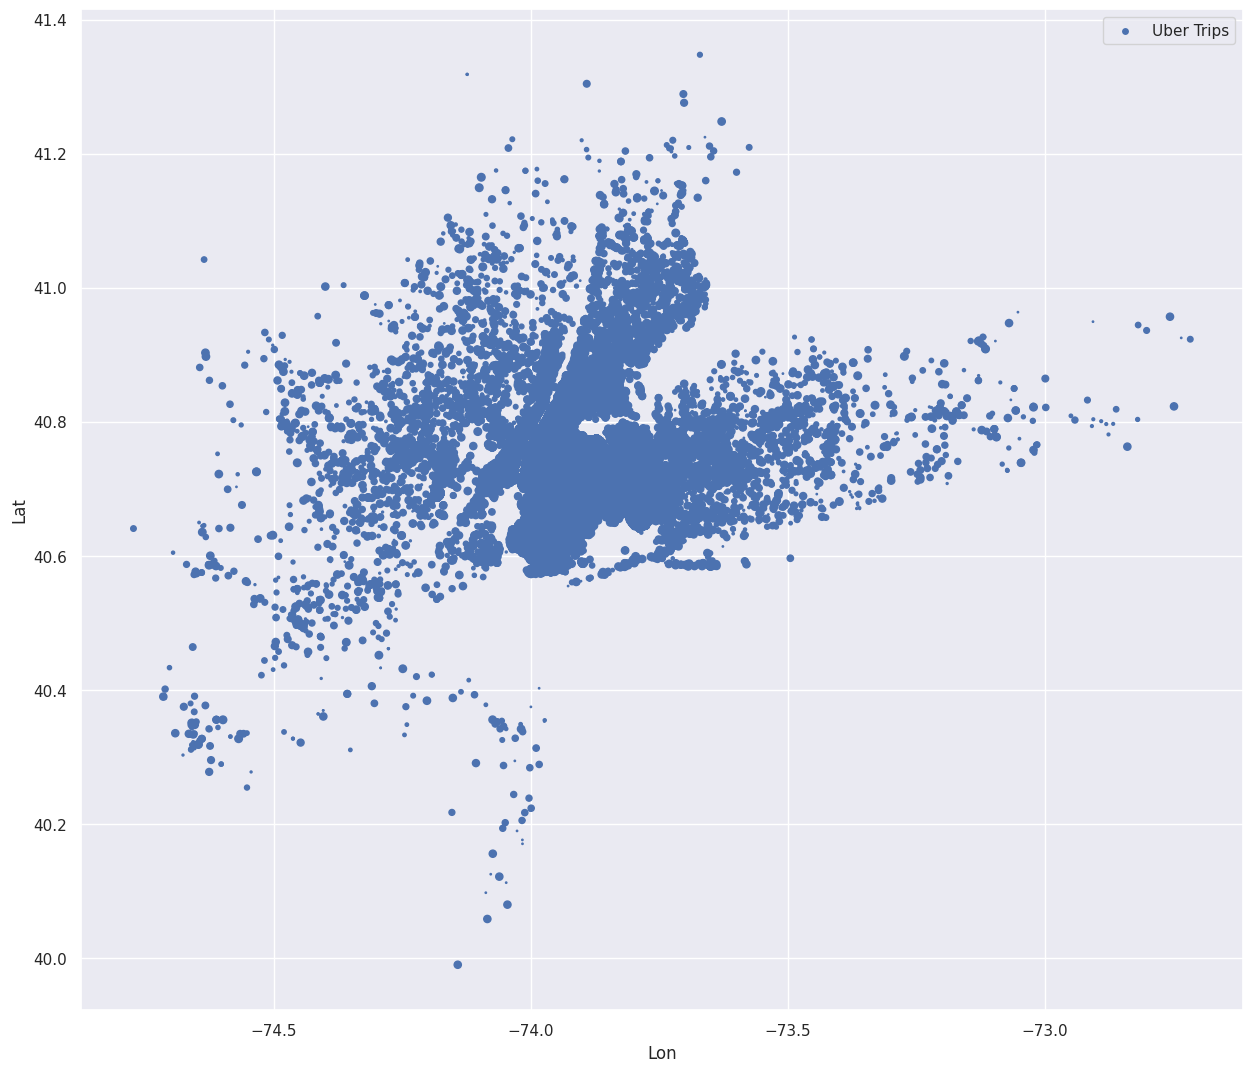

In [46]:
df.plot(kind='scatter',x='Lon',y='Lat', s=df['day'], label='Uber Trips')